군집으로 할 수 있는 것이 많다. 데이터 분류, 차원 축소로도 활용, 이상치 탐지할 때 사용 등..예를 들어 물건판매하는 웹싸이트에서 고객들 데이터를 A,B,C,D 그룹으로 나누고 각 그룹의 특성을 확인한다. A는 어떤 사람이고 어떤 소비 특성이 있는 지를 보는 것임. 여기서 새로운 고객이 들어오면 어떤 그룹에 들어가는지 보고 그에 맞춰서 물건 추천, 쿠폰 발행, 광고 노출 하도록 하는 식으로 활용 가능. 대표적인 군집 알고리즘은 K-mean 알고리즘이다.

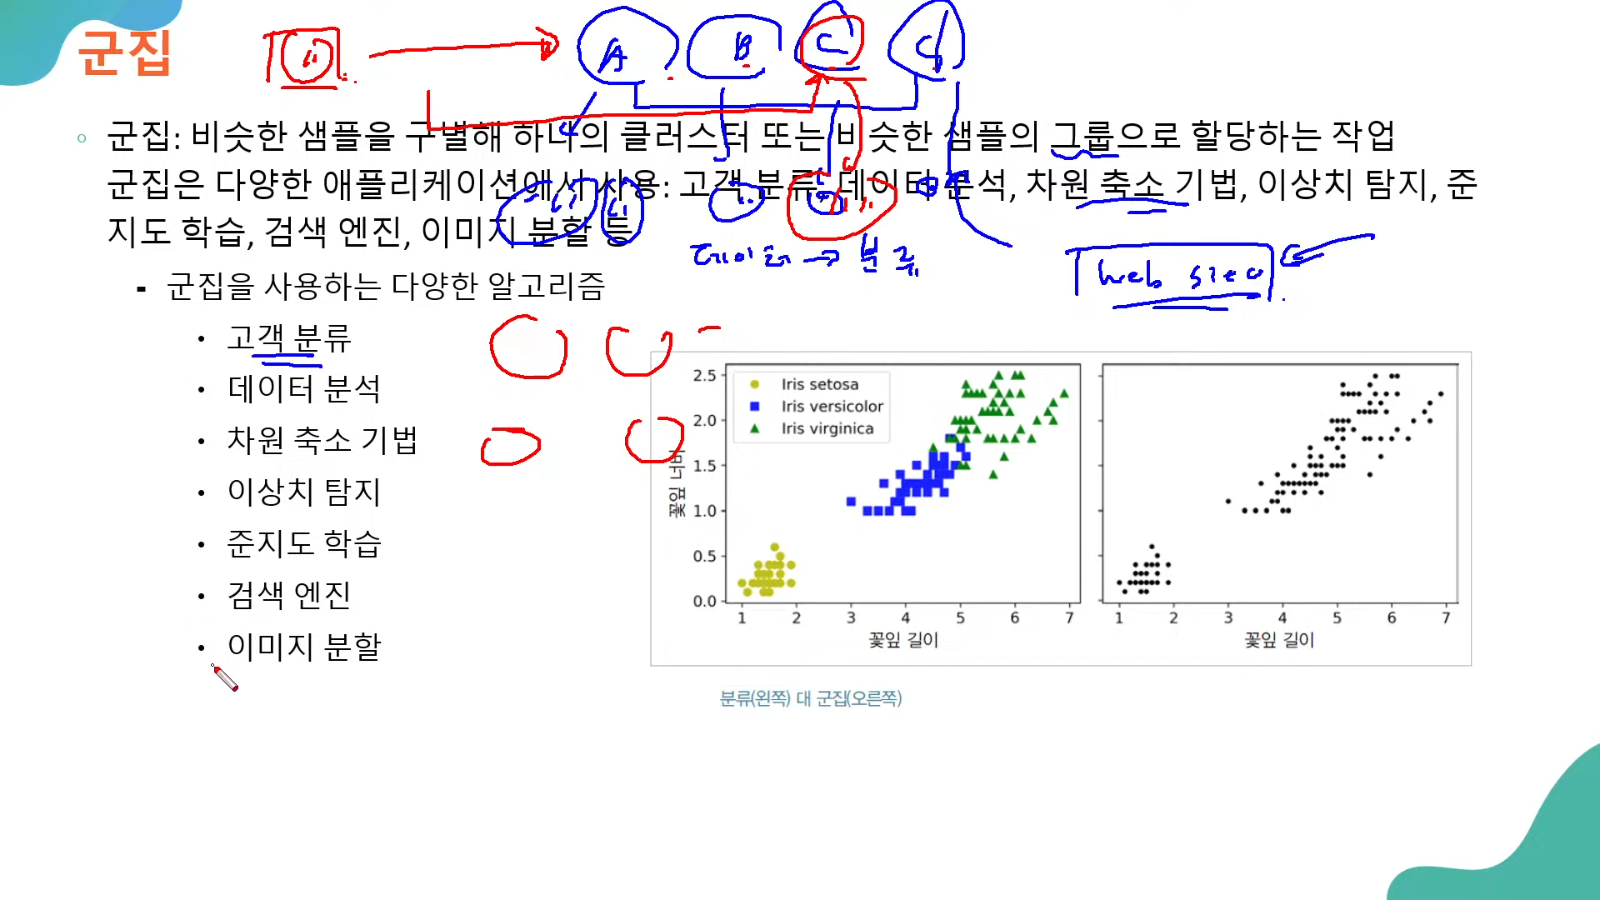

In [3]:
import mglearn

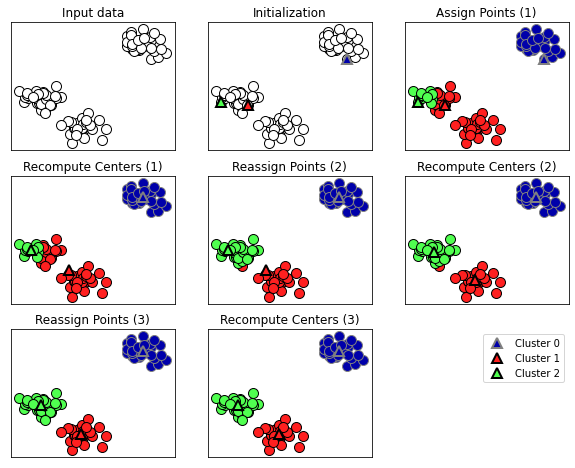

In [4]:
mglearn.plots.plot_kmeans_algorithm()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

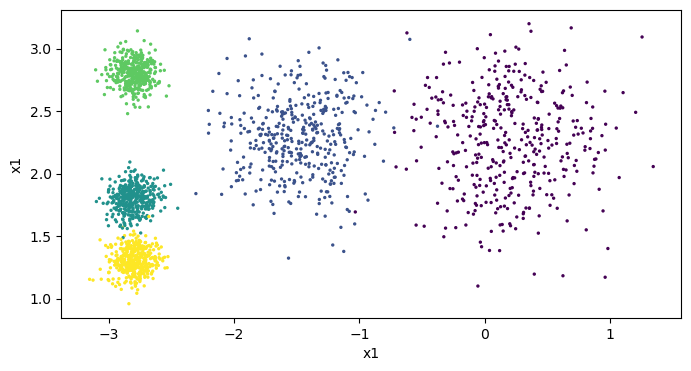

In [3]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3],
    [-1.5, 2.3],
    [-2.8, 1.8],
    [-2.8, 2.8],
    [-2.8, 1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
x, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)

def plot_cluster(x, y=None):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=2)
    plt.xlabel('x1')
    plt.ylabel('x1')

plt.figure(figsize=(8, 4))
plot_cluster(x, y)
plt.show()

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(x)
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [5]:
kmeans.cluster_centers_ # 군집별 중심값을 확인해볼 수 있음

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [15]:
x_new = np.array([[0, 2], [3, 2], [-4, 4], [-3, 2.5]]) # 새로운 데이터가 들어갔을 때 어느 군집에 속하는지 확인 가능
kmeans.predict(x_new)

array([1, 1, 2, 2])

K-Means 에서 초기 시작 지점은 일반적으로 random 으로 지정되고, 해당 초기값 셋팅을 원하는 수만큼 할 수 있는데 이 값이 n_init 값이다. 그런데 시작지점을 대략 알고 있다면 별도 설정할 수 있고, 굳이 n_init을 많이 할 필요 없다.

In [16]:
c_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]]) # 초기 시작점을 별도 셋팅하는 경우
kmeans2 = KMeans(n_clusters=5, init=c_init, n_init=1, random_state=42) # n_init을 1로 셋팅해도 됨
kmeans2.fit(x)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [6]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='o', s=35, linewidths=8,
               color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
               marker='x', s=2, linewidths=12,
               color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                        np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap='Pastel2')
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)
    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

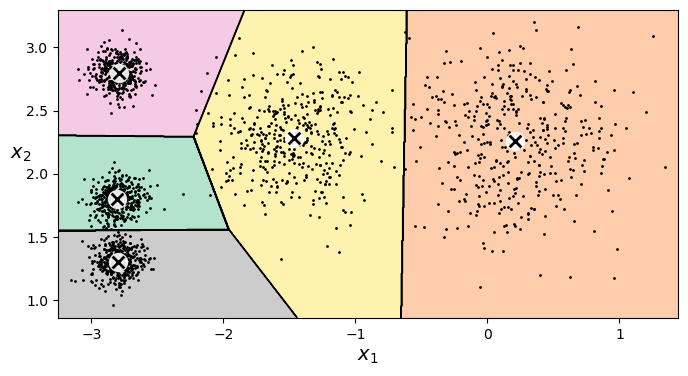

In [7]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, x)
plt.show()

색에 대한 분할, 즉 Segmentation도 군집을 활용할 수 있다. 먼저 이미지를 읽어오자.

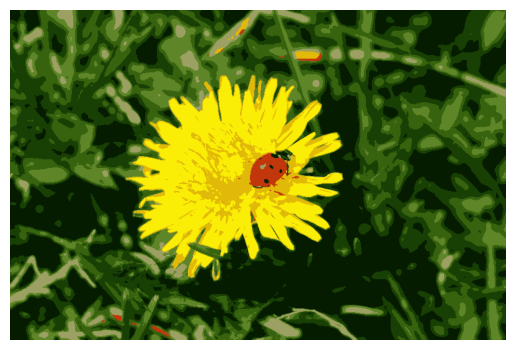

In [9]:
from matplotlib.image import imread

image = imread('ladybug.png')
x = image.reshape(-1, 3)

# KMeans로 8개로 군집화된 센터의 정보에서 KMeans의 label 즉, 각 군집화 그룹의 label(0, 1, ... , 7) 로 indexing 하면 x 데이터 전체(각 픽셀)에서의 군집화 대표값으로 매핑되는 데(segmented_img)
# 이 값을 다시 원본 image 의 shape으로 바꾼 뒤 이미지를 출력하면 원본 사진이 그룹화된 8가지 대표색깔로 segmentation된 컬러로 변경된 것이 나타난다.
kmeans = KMeans(n_clusters=8, random_state=42).fit(x)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] 
segmented_img = segmented_img.reshape(image.shape)
plt.imshow(segmented_img)
plt.axis('off')
plt.show()

In [6]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
path = [fn for fn in font_manager.findSystemFonts() if 'malgun' in fn][0]
fontprop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = fontprop.get_name()
mpl.rcParams['axes.unicode_minus'] = False # 한글 font 사용 시, 마이너스 글자가 깨지는 현상 해결

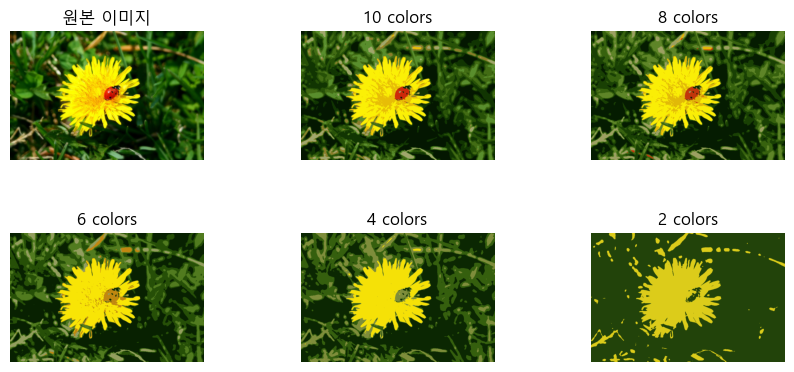

In [14]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

# 아래는 군집화 개수를 10 ~ 2개로 변경시키면서 KMeans 군집화한 뒤, 각 군집화 개수별 이미지를 출력하는 코드임
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(x)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
    
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title('원본 이미지')
plt.axis('off')

for idx, n_cluster in enumerate(n_colors):
    plt.subplot(232+idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f'{n_cluster} colors')
    plt.axis('off')
plt.show()

KMeans 도 단점이 있는데 길쭉한 형태의 데이터에는 좋지 않음, 아래 예시 참조

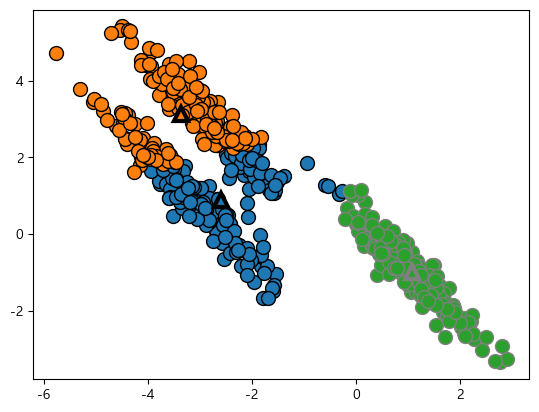

In [49]:
x, y = make_blobs(random_state=170, n_samples=600)
transformation = np.random.RandomState(74).normal(size=(2, 2))
x = np.dot(x, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
y_pred = kmeans.predict(x)

mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0],
                        kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=3)
plt.show()

아래와 같은 moon 모양 데이터도 군집화에는 취약함

In [44]:
from sklearn.datasets import make_moons

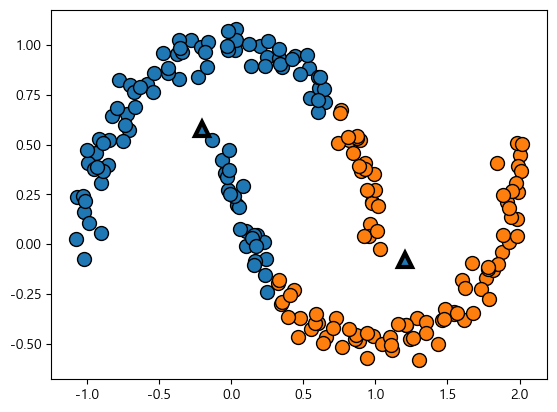

In [46]:
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_pred = kmeans.predict(x)

mglearn.discrete_scatter(x[:, 0], x[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], markers='^', markeredgewidth=3)
plt.show()

그래서 KMeans 대신 할 수 있는 군집화 알고리즘 중에 병합 군집이 있다. 병합 군집은 가지고 있는 포인트 하나하나가 군집이라는 가정하에 시작함. 시작할 때 군집 개수(n_clusters)를 지정하고 군집 중에서 가장 가까운 애를 찾아서 병합하는 식이다. 
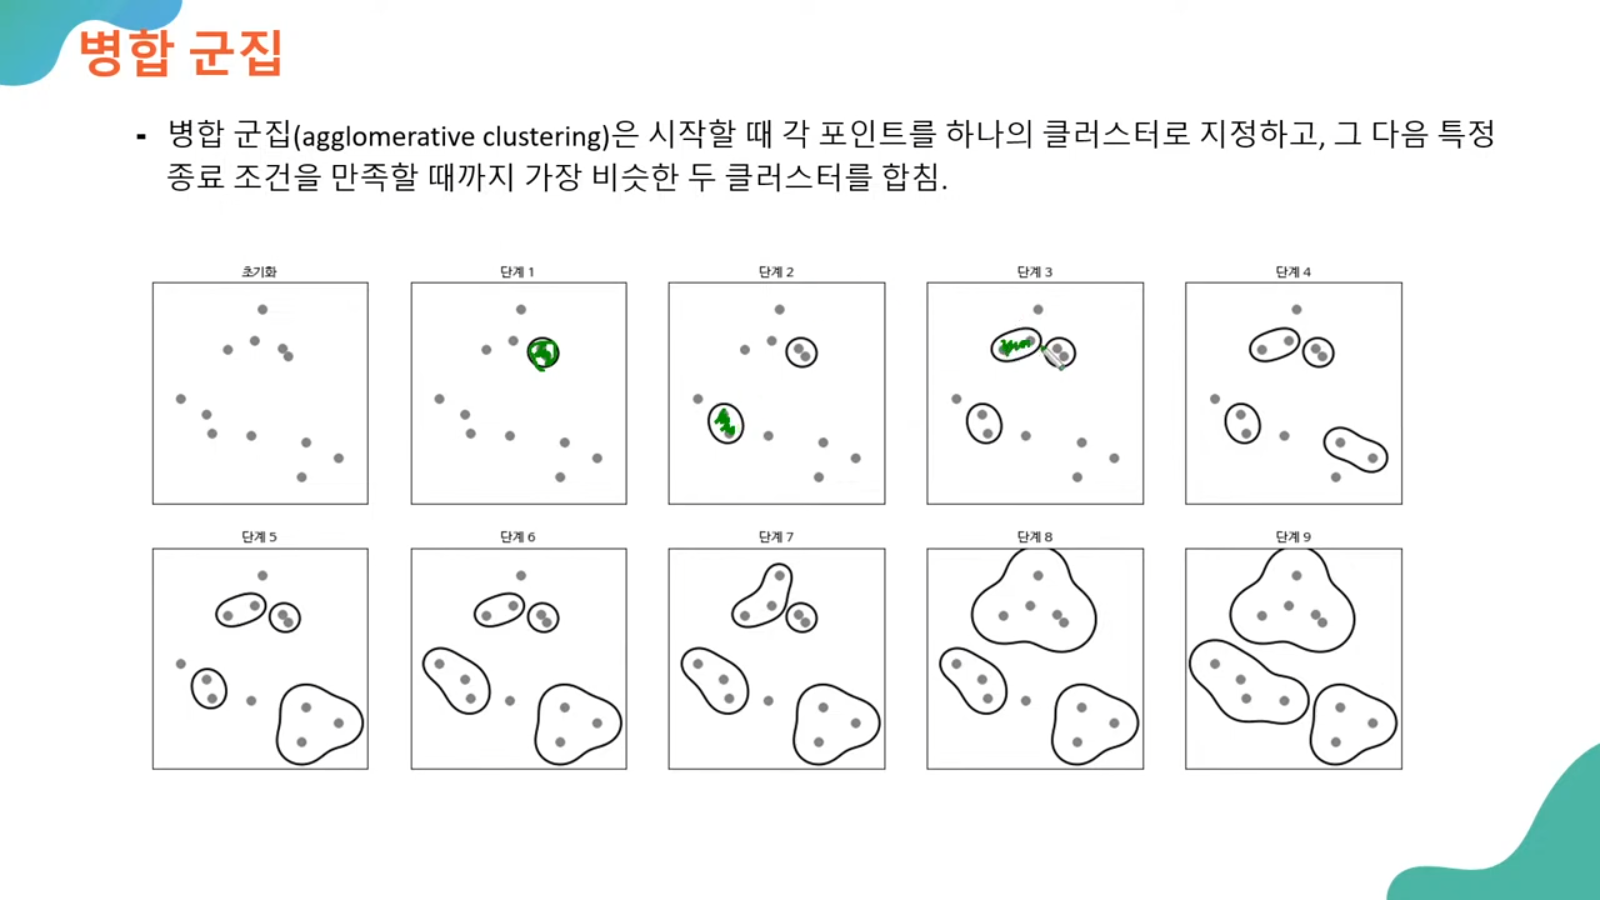
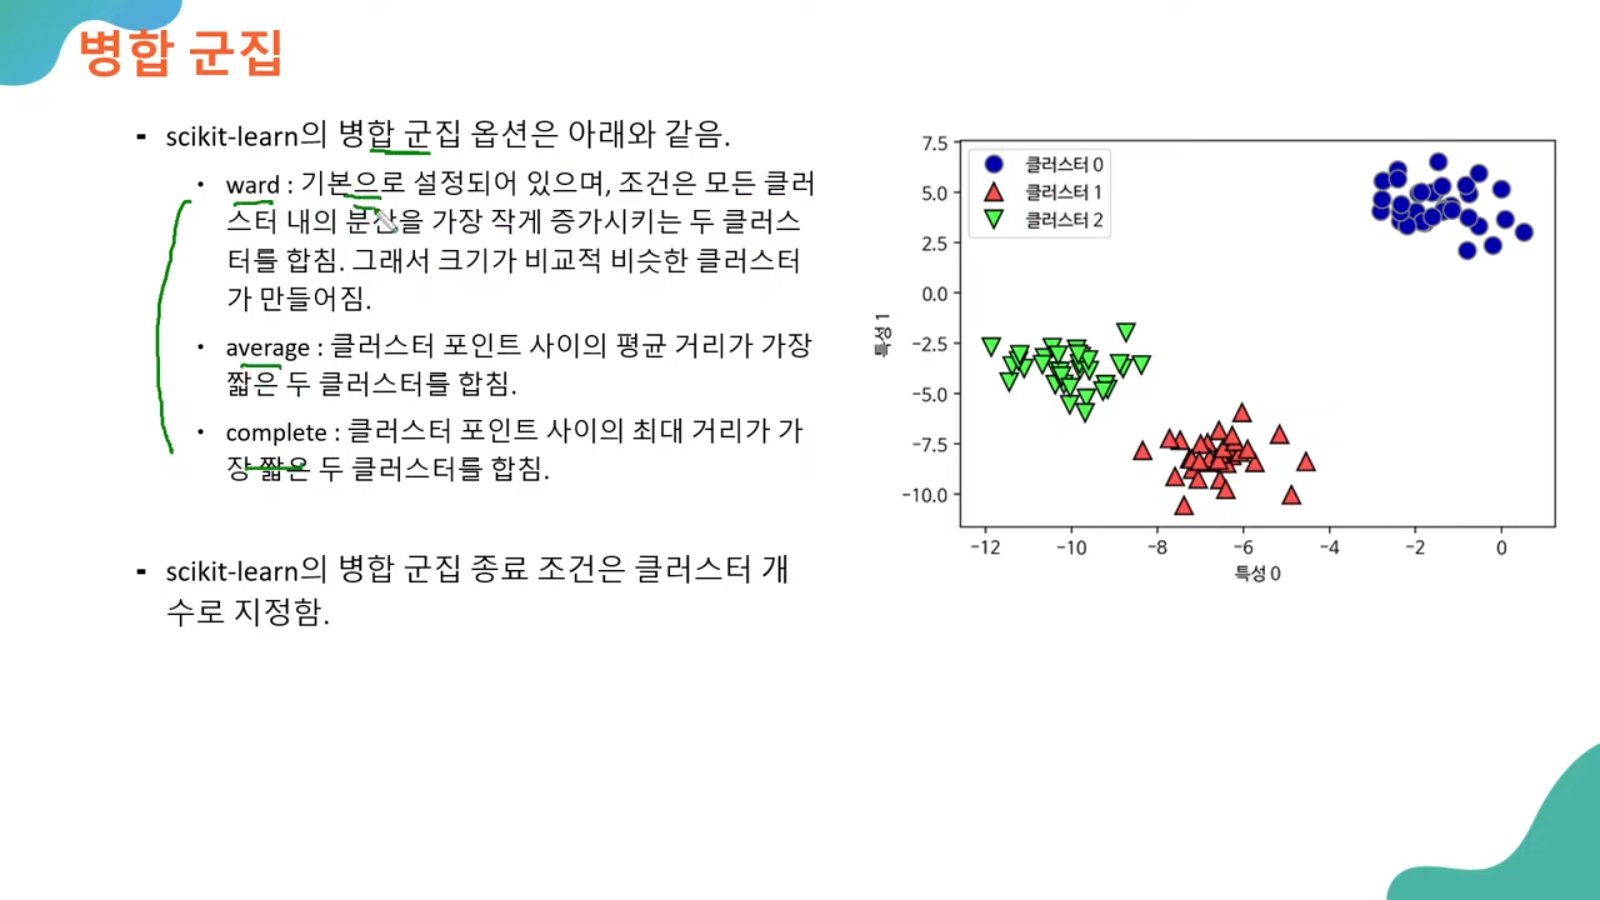

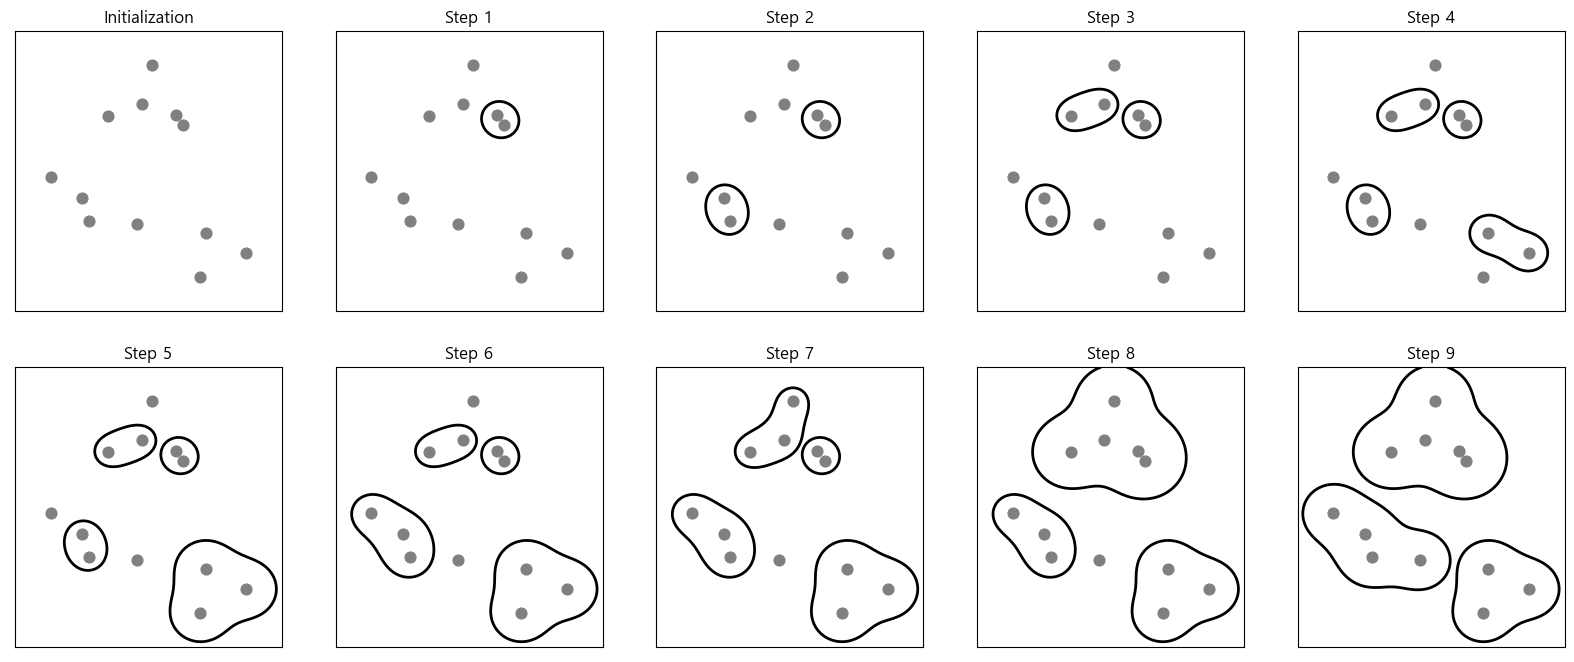

In [50]:
mglearn.plots.plot_agglomerative_algorithm()

In [51]:
from sklearn.datasets import load_iris # iris 데이터로 병합 군집 진행
from sklearn.cluster import AgglomerativeClustering # 병합 군집을 위한 모듈 불러옴
from sklearn.preprocessing import StandardScaler # iris 데이터를 scale 하기 위한 standard scaler 불러옴

iris = load_iris()
scaler = StandardScaler()
f_std = scaler.fit_transform(iris.data) # iris 데이터를 standard scaler로 변환

cluster = AgglomerativeClustering(n_clusters=3, linkage='complete') # complete 방식으로 3개로 병합 군집 해봄
model = cluster.fit(f_std)
model.labels_ # 병합 군집으로 학습했을 때 클러스터가 아래와 같이 나뉨

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
iris.target # 아래는 iris의 실제 target 값. 위와 비교해봤을 때 일부 틀린 것도 있으나 비슷하게 군집화한 것을 볼 수 있음

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

DBSCAN 이라고 얼마나 밀집되어 있는지와 noise 개념이 들어가 있는데, 파라미터가 2개임(min samples, eps). 방식은 어떤 포인트가 있을 때, eps 거리 내에 min sample 보다 많이 가지고 있으면 하나의 클러스터로 인정하겠다는 방식. 장점은 cluster 개수를 몇개를 해야 하는지 모를 경우도 많은데, DBSCAN 은 클러스터 개수를 지정하지 않아도 적당한 클러스터 개수를 뽑아줌
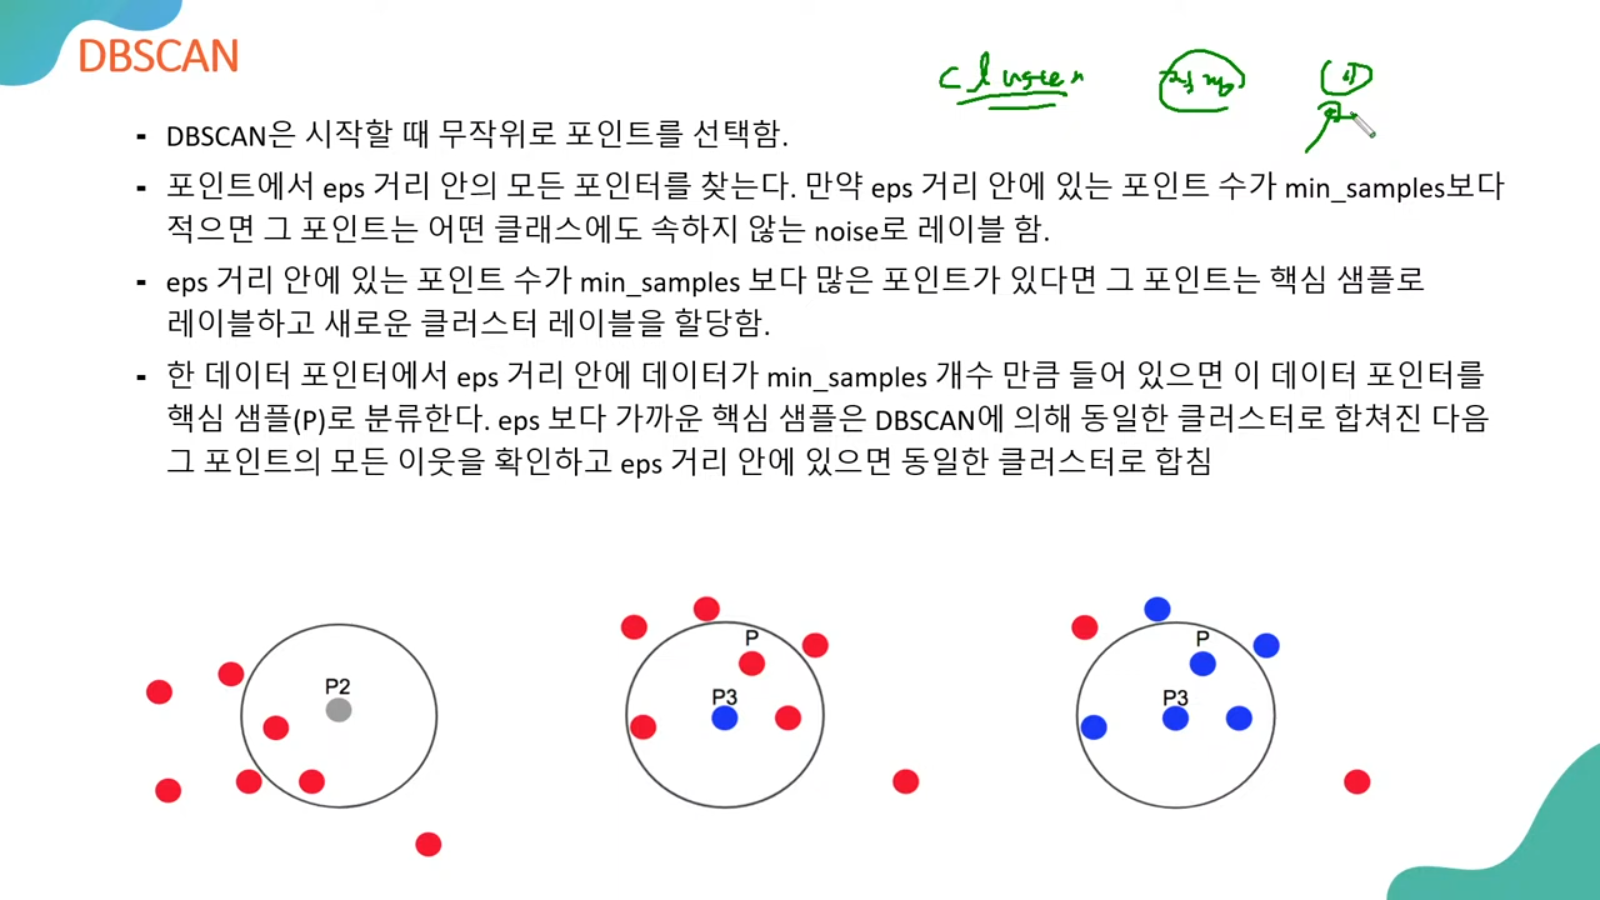

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


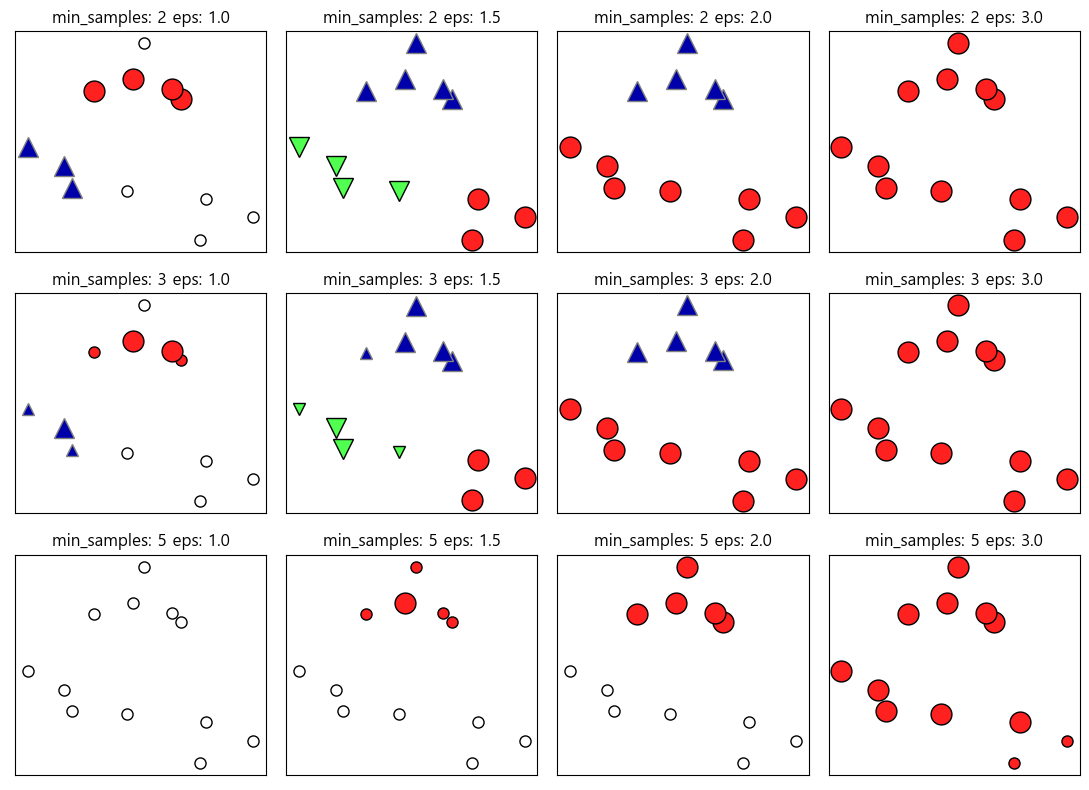

In [53]:
mglearn.plots.plot_dbscan() # eps 거리와 min_sample에 따라 군집화 결과가 차이가 크다. 적절하게 eps, min_sample을 정해줘야 함

In [85]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)
    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap='Paired')
    plt.scatter(cores[:, 0], cores[:, 1], marker='+', s=20, c=dbscan.labels_[core_mask], cmap=plt.cm.hot)
    
    if show_xlabels:
        plt.xlabel('$x_1$', fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel('$x_2$', fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title('eps={:.2f}, min_samples={}'.format(dbscan.eps, dbscan.min_samples), fontsize=14)        

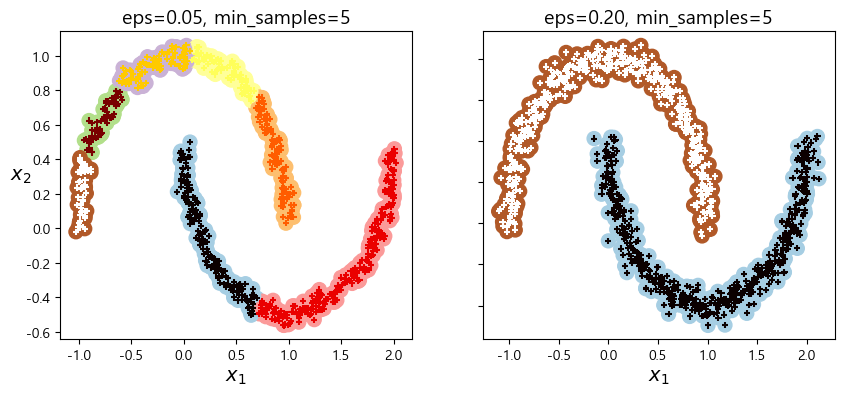

In [86]:
from sklearn.cluster import DBSCAN

x, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(x)

dbscan2 = DBSCAN(eps=0.2, min_samples=5)
dbscan2.fit(x)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_dbscan(dbscan, x, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, x, size=100, show_ylabels=False)
plt.show() # eps를 적절히 크게 해주면 아래와 같은 moon 데이터를 잘 나누는 것을 볼 수 있음

클러스터 모델들의 성능을 평가하는 함수를 사용하여 각 클러스터 모델별로 점수를 매겨보자(adjusted_rand_score 사용)

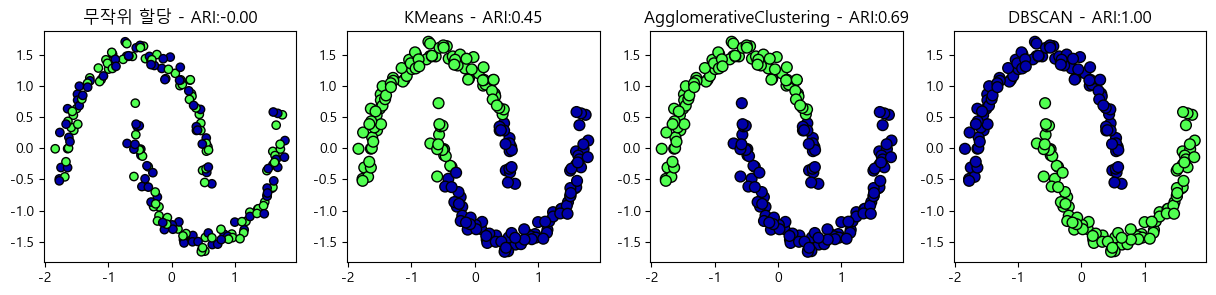

In [90]:
from sklearn.metrics.cluster import adjusted_rand_score

x, y = make_moons(n_samples=200, noise=0.05, random_state=42)

scaler = StandardScaler() # standard scaler로 특성치의 값들을 scaling
scaler.fit(x)
x_scaled = scaler.transform(x)

fig, axes = plt.subplots(1, 4, figsize=(15, 3))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x)) # 군집화 모델없이 아무렇게나 random 으로 0~2 사이의 숫자로 군집화하는 경우도 점수를 보기 위해 설정

axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, edgecolors='black')
axes[0].set_title('무작위 할당 - ARI:{:.2f}'.format(adjusted_rand_score(y, random_clusters)))

for ax, algorithms in zip(axes[1:], algorithms):
    clusters = algorithms.fit_predict(x_scaled)
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolor='black')
    ax.set_title('{} - ARI:{:.2f}'.format(algorithms.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show() # 무작위 할당은 당연히 0점이고, DBSCAN이 1로 가장 높은 것을 볼 수 있다.

mnist 데이터를 가져와 train, validation, test 로 분리하고, Voting 시스템으로 여러가지 분류모델을 조합하여 분류모델 만들기 예제

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

In [13]:
mnist.target = mnist.target.astype(np.uint8)

X_train_val, X_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=10000,random_state=42)

In [24]:
# 랜덤포레스트, Decision Tree, 로지스틱 회귀 3가지 모델에 대해 훈련세트로 모델 만들고 validation 세트로 모델 평가
random_forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
dtrees_clf = DecisionTreeClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)

estimators = [random_forest_clf, dtrees_clf, log_clf]
for estimator in estimators:
    print('Training the', estimator)
    estimator.fit(X_train, y_train)
print([estimator.score(X_val, y_val) for estimator in estimators])

Training the RandomForestClassifier(random_state=42)
Training the DecisionTreeClassifier(random_state=42)
Training the LogisticRegression(random_state=42)


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.9692, 0.8684, 0.9186]


In [25]:
# Voting 시스템으로 모델 구성해봄
named_estimators = [
    ('random_forest_clf', random_forest_clf),
    ('decision_trees_clf', dtrees_clf),
    ('log_clf', log_clf)
]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)
print(voting_clf.score(X_val, y_val)) # Voting 시스템의 점수가 위의 각각의 모델의 점수의 평균보다는 좋은 편으로 나옴

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.956
